#### Merging ca-flu-1525 and ca-2225

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df1 = pd.read_csv("df-2225.csv")
df2 = pd.read_csv("df-flu-1525.csv")

In [94]:
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       1240 non-null   object 
 1   YEAR         1240 non-null   int64  
 2   WEEK         1240 non-null   int64  
 3   LABEL        1240 non-null   object 
 4   TOTAL CASES  1210 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 48.6+ KB


In [95]:
df["LABEL"] = df["LABEL"].replace("Salmonellosis (excluding Salmonella Typhi infection and Salmonella Paratyphi infection)", "Salmonellosis")
df.head()

,REGION,YEAR,WEEK,LABEL,TOTAL CASES
0,CALIFORNIA,2022,1,Campylobacteriosis,47.0
1,CALIFORNIA,2022,1,Coccidioidomycosis,10.0
2,CALIFORNIA,2022,1,Salmonellosis,1.0
3,CALIFORNIA,2022,2,Campylobacteriosis,30.0
4,CALIFORNIA,2022,2,Coccidioidomycosis,8.0


In [96]:
df["LABEL"].unique()

array(['Campylobacteriosis', 'Coccidioidomycosis', 'Salmonellosis',
       'Coccidioidomycosis, Confirmed', 'Coccidioidomycosis, total',
       'Coccidioidomycosis, Total', 'influenza'], dtype=object)

#### Removing duplicate rows

In [97]:
conf = df[df["LABEL"] == "Coccidioidomycosis, Confirmed"]
total = df[df["LABEL"] == "Coccidioidomycosis, total"]
Total = df[df["LABEL"] == "Coccidioidomycosis, Total"]

In [98]:
conf.head()

,REGION,YEAR,WEEK,LABEL,TOTAL CASES
157,CALIFORNIA,2023,1,"Coccidioidomycosis, Confirmed",25.0
161,CALIFORNIA,2023,2,"Coccidioidomycosis, Confirmed",44.0
165,CALIFORNIA,2023,3,"Coccidioidomycosis, Confirmed",23.0
169,CALIFORNIA,2023,4,"Coccidioidomycosis, Confirmed",53.0
173,CALIFORNIA,2023,5,"Coccidioidomycosis, Confirmed",35.0


In [99]:
total.head()

,REGION,YEAR,WEEK,LABEL,TOTAL CASES
158,CALIFORNIA,2023,1,"Coccidioidomycosis, total",25.0
162,CALIFORNIA,2023,2,"Coccidioidomycosis, total",44.0
166,CALIFORNIA,2023,3,"Coccidioidomycosis, total",23.0
170,CALIFORNIA,2023,4,"Coccidioidomycosis, total",53.0
174,CALIFORNIA,2023,5,"Coccidioidomycosis, total",35.0


In [100]:
Total.head()

,REGION,YEAR,WEEK,LABEL,TOTAL CASES
570,California,2025,1,"Coccidioidomycosis, Total",17.0
574,California,2025,2,"Coccidioidomycosis, Total",56.0
578,California,2025,3,"Coccidioidomycosis, Total",46.0
582,California,2025,4,"Coccidioidomycosis, Total",39.0
586,California,2025,5,"Coccidioidomycosis, Total",55.0


In [101]:
conf.info()
total.info()
Total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 157 to 717
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       141 non-null    object 
 1   YEAR         141 non-null    int64  
 2   WEEK         141 non-null    int64  
 3   LABEL        141 non-null    object 
 4   TOTAL CASES  141 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 158 to 566
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       103 non-null    object 
 1   YEAR         103 non-null    int64  
 2   WEEK         103 non-null    int64  
 3   LABEL        103 non-null    object 
 4   TOTAL CASES  103 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 570 to 718
Data columns (tota

In [102]:
new_total = pd.concat([total, Total], ignore_index=False)

In [103]:
new_total.head()

,REGION,YEAR,WEEK,LABEL,TOTAL CASES
158,CALIFORNIA,2023,1,"Coccidioidomycosis, total",25.0
162,CALIFORNIA,2023,2,"Coccidioidomycosis, total",44.0
166,CALIFORNIA,2023,3,"Coccidioidomycosis, total",23.0
170,CALIFORNIA,2023,4,"Coccidioidomycosis, total",53.0
174,CALIFORNIA,2023,5,"Coccidioidomycosis, total",35.0


In [104]:
new_total["LABEL"].unique()

array(['Coccidioidomycosis, total', 'Coccidioidomycosis, Total'],
      dtype=object)

In [105]:
new_total["LABEL"] = new_total["LABEL"].replace("Coccidioidomycosis, total", "Coccidioidomycosis, Total")
new_total["LABEL"].unique()

array(['Coccidioidomycosis, Total'], dtype=object)

In [106]:
conf.info()
print("==============")
new_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 157 to 717
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       141 non-null    object 
 1   YEAR         141 non-null    int64  
 2   WEEK         141 non-null    int64  
 3   LABEL        141 non-null    object 
 4   TOTAL CASES  141 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 158 to 718
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       141 non-null    object 
 1   YEAR         141 non-null    int64  
 2   WEEK         141 non-null    int64  
 3   LABEL        141 non-null    object 
 4   TOTAL CASES  141 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.6+ KB


In [107]:
conf = conf.drop(columns=["LABEL"])
new_total = new_total.drop(columns=["LABEL"])

In [108]:
conf = conf.reset_index(drop=True)
new_total = new_total.reset_index(drop=True)


In [109]:
conf.head()

,REGION,YEAR,WEEK,TOTAL CASES
0,CALIFORNIA,2023,1,25.0
1,CALIFORNIA,2023,2,44.0
2,CALIFORNIA,2023,3,23.0
3,CALIFORNIA,2023,4,53.0
4,CALIFORNIA,2023,5,35.0


In [110]:
new_total.head()

,REGION,YEAR,WEEK,TOTAL CASES
0,CALIFORNIA,2023,1,25.0
1,CALIFORNIA,2023,2,44.0
2,CALIFORNIA,2023,3,23.0
3,CALIFORNIA,2023,4,53.0
4,CALIFORNIA,2023,5,35.0


In [111]:
conf.equals(new_total)

True

In [112]:
df = df[df["LABEL"] != 'Coccidioidomycosis, Confirmed']

In [113]:
df["LABEL"] = df["LABEL"].replace("Coccidioidomycosis, total", "Coccidioidomycosis")
df["LABEL"] = df["LABEL"].replace("Coccidioidomycosis, Total", "Coccidioidomycosis")
df["LABEL"] = df["LABEL"].replace("influenza", "Influenza")

In [114]:
df["LABEL"].unique()

array(['Campylobacteriosis', 'Coccidioidomycosis', 'Salmonellosis',
       'Influenza'], dtype=object)

In [115]:
df = df.sort_values(["YEAR", "WEEK"]).reset_index(drop=True)
df.head(25)

,REGION,YEAR,WEEK,LABEL,TOTAL CASES
0,California,2015,40,Influenza,2.0
1,California,2015,41,Influenza,5.0
2,California,2015,42,Influenza,2.0
3,California,2015,43,Influenza,0.0
4,California,2015,44,Influenza,9.0
5,California,2015,45,Influenza,9.0
6,California,2015,46,Influenza,6.0
7,California,2015,47,Influenza,5.0
8,California,2015,48,Influenza,16.0
9,California,2015,49,Influenza,9.0


In [116]:
df.to_csv('test.csv', index=False)

#### Add temperature data

In [117]:
df_temp = pd.read_csv("df-temp-1525.csv")
df = df.merge(
    df_temp,
    on=["YEAR", "WEEK"],
    how="left"
)
df.head()

,REGION,YEAR,WEEK,LABEL,TOTAL CASES,TAVG,TMAX,TMIN
0,California,2015,40,Influenza,2.0,16.971429,25.0,7.8
1,California,2015,41,Influenza,5.0,20.042857,28.9,10.6
2,California,2015,42,Influenza,2.0,19.757143,31.7,10.0
3,California,2015,43,Influenza,0.0,17.571429,25.0,10.6
4,California,2015,44,Influenza,9.0,17.242857,27.8,10.0


In [118]:
df = df.drop(columns=["TAVG_y", "TMAX_y", "TMIN_y"])

KeyError: "['TAVG_y', 'TMAX_y', 'TMIN_y'] not found in axis"

In [ ]:
df = df.rename(columns={
    "TAVG_x": "TAVG",
    "TMAX_x": "TMAX",
    "TMIN_x": "TMIN",
})
df.head()

,REGION,YEAR,WEEK,LABEL,TOTAL CASES,TAVG,TMAX,TMIN
0,California,2015,40,Influenza,2.0,16.971429,25.0,7.8
1,California,2015,41,Influenza,5.0,20.042857,28.9,10.6
2,California,2015,42,Influenza,2.0,19.757143,31.7,10.0
3,California,2015,43,Influenza,0.0,17.571429,25.0,10.6
4,California,2015,44,Influenza,9.0,17.242857,27.8,10.0


<Axes: >

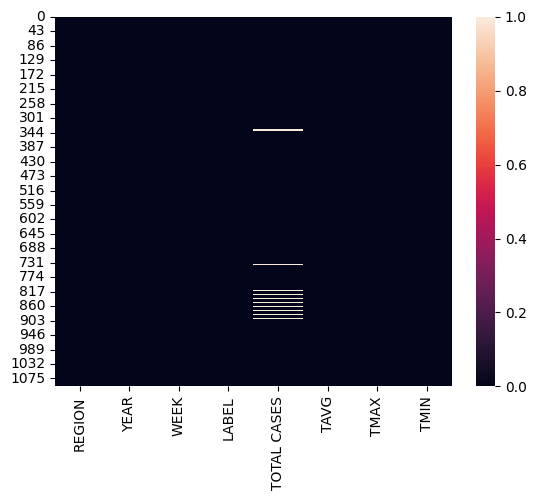

In [ ]:
sns.heatmap(df.isnull())